# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar Dataset

In [3]:

# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [4]:
# mostrar las primeras 5 filas
df.head()

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

💡
Después de analizar la información anterior, completa la siguiente sección.  
- Si aplica, señala la o las columnas que requieren algun cambio


#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.


**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- `nivel_ingreso`
- `visitas_mes`
- `compras_mes`
- `gasto_publicidad_dirigida`
- `satisfaccion`
- `ingreso anual`

La mayoría de estas variables presentan tipos de datos adecuados.  
La columna `satisfaccion`, aunque es numérica, representa una escala discreta (1–5), por lo que su interpretación debe considerar que se trata de una variable ordinal con rango limitado. Asimismo, `ingreso_anual` se identifica como la variable objetivo principal del análisis, ya que representa el valor económico generado por cada cliente.

**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas y **no requieren transformación adicional**.

In [5]:
# Corregir el tipo de dato
df['miembro_premium'] = df['miembro_premium'].astype('int')
df['abandono'] = df['abandono'].astype('int')
df['id_cliente'] = df['id_cliente'].astype('category')
df['tipo_dispositivo'] = df['tipo_dispositivo'].astype('category')
df['region'] = df['region'].astype('category')

In [6]:
# verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id_cliente                 15000 non-null  category
 1   edad                       15000 non-null  float64 
 2   nivel_ingreso              15000 non-null  float64 
 3   visitas_mes                15000 non-null  int64   
 4   compras_mes                15000 non-null  int64   
 5   gasto_publicidad_dirigida  15000 non-null  float64 
 6   satisfaccion               15000 non-null  float64 
 7   miembro_premium            15000 non-null  int64   
 8   abandono                   15000 non-null  int64   
 9   tipo_dispositivo           15000 non-null  category
 10  region                     15000 non-null  category
 11  ingreso_anual              15000 non-null  float64 
dtypes: category(3), float64(5), int64(4)
memory usage: 1.7 MB


#### Explorar variables numéricas

In [9]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,ingreso_anual
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,38.262400,30019.704782,10.029000,1.206467,20.149301,3.603693,0.139267,0.150733,36.594180
std,11.492378,9833.166305,3.158189,1.105284,10.880724,0.685300,0.346236,0.357801,34.484888
min,18.000000,8000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,23127.097500,8.000000,0.000000,12.310000,3.100000,0.000000,0.000000,0.000000
50%,38.000000,30023.745000,10.000000,1.000000,19.730000,3.600000,0.000000,0.000000,30.705000
75%,46.000000,36768.440000,12.000000,2.000000,27.292500,4.100000,0.000000,0.000000,58.220000
max,75.000000,74790.840000,25.000000,8.000000,75.510000,5.000000,1.000000,1.000000,244.690000


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables numéricas

- `edad` — Presenta un rango amplio (18 a 75 años) con media y mediana muy cercanas, lo que sugiere una distribución relativamente equilibrada sin sesgo evidente.
- `nivel_ingreso` - Muestra alta variabilidad (std elevada respecto a la media), indicando diferencias significativas en el poder adquisitivo entre clientes. No se observan valores extremos desproporcionados.
- `visitas_mes` - Distribución relativamente centrada alrededor de 10 visitas mensuales, con dispersión moderada. El valor máximo (25) podría representar usuarios altamente activos.
- `compras_mes` - Media baja cercana a 1 compra mensual y mediana de 1, lo que sugiere que muchos usuarios realizan pocas compras. El rango hasta 8 compras indica presencia de clientes más activos.
- `gasto_publicidad_dirigida` - Presenta variabilidad considerable y un máximo notablemente mayor al percentil 75, lo que sugiere posibles valores extremos o segmentos con alta inversión publicitaria.
- `satisfaccion` - Variable en escala limitada (1–5), con media cercana a 3.6, indicando niveles moderados de satisfacción y baja dispersión relativa.
- `ingreso anual` - Variable objetivo con alta dispersión y presencia de valores bajos (incluyendo cero), lo que indica que algunos usuarios generan poco o ningún ingreso, mientras que otros presentan valores significativamente altos.

#### Explorar variables binarias

In [10]:
# Verificar que cada columna tenga únicamente dos valores posibles
print(df['miembro_premium'].unique())
print(df['abandono'].unique())

[0 1]
[0 1]


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables binarias

- `miembro_premium` — Variable binaria con media cercana a 0.14, indicando que aproximadamente el 14% de los usuarios cuenta con membresía premium.
- `abandono` — Variable binaria con media cercana a 0.15, lo que sugiere una tasa de abandono aproximada del 15%.

#### Explorar variables categóricas

In [11]:
# Verificar el número de valores únicos por variable categórica
for col in ['id_cliente', 'tipo_dispositivo', 'region']:
    print(f"{col}: {df[col].nunique()} valores únicos")

id_cliente: 15000 valores únicos
tipo_dispositivo: 3 valores únicos
region: 4 valores únicos


In [12]:
# Explorar variables categóricas y cómo se distribuyen
for col in ['tipo_dispositivo', 'region']:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())


Distribución de tipo_dispositivo:
móvil         9818
escritorio    3720
tablet        1462
Name: tipo_dispositivo, dtype: int64

Distribución de region:
norte    4395
oeste    3810
sur      3726
este     3069
Name: region, dtype: int64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables categóricas

- `tipo_dispositivo` — Contiene 3 categorías (móvil, escritorio y tablet). Se observa una clara predominancia del uso de dispositivos móviles, lo que sugiere que la mayoría de los usuarios interactúan con la plataforma desde este tipo de dispositivo.
- `region` - Incluye 4 categorías (norte, oeste, sur y este), con una distribución relativamente equilibrada entre regiones, aunque la región norte concentra una mayor proporción de usuarios.
- `id_cliente` - Presenta 15,000 valores únicos, confirmando que funciona correctamente como identificador individual para cada registro.

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

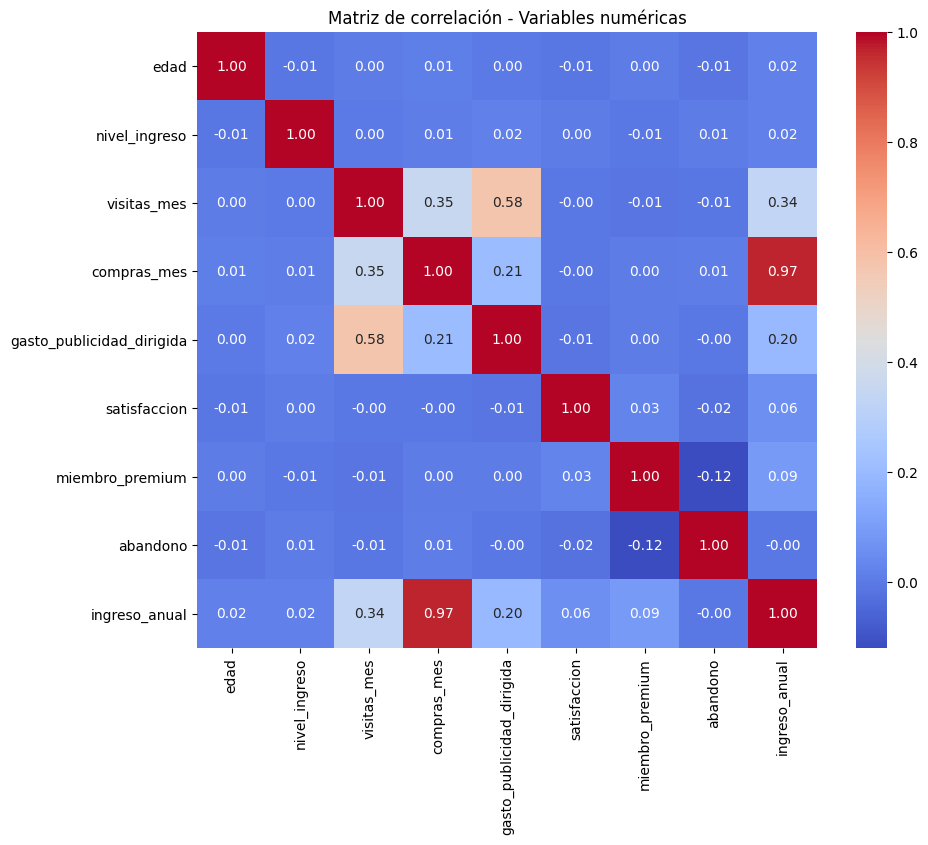

In [13]:
# Visualizar la matriz de correlación para identificar relaciones
df_num = df.select_dtypes(include=['number'])
corr_matrix = df_num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de correlación - Variables numéricas')
plt.show()

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves


Observaciones generales (Heatmap)  
- Se observa que la mayoría de las variables presentan correlaciones bajas entre sí, lo que indica relaciones débiles o prácticamente inexistentes entre varios factores demográficos y de comportamiento. Sin embargo, destacan algunas asociaciones moderadas, como la relación positiva entre `visitas_mes` y `gasto_publicidad_dirigida`, así como entre `visitas_mes` y `compras_mes`, lo que sugiere que una mayor actividad en la plataforma podría estar asociada con mayor exposición publicitaria y mayor frecuencia de compra.

Observaciones respecto a `ingreso_anual`  
- Presenta una correlación positiva muy fuerte con `compras_mes` (0.97), indicando que la frecuencia de compras está altamente asociada con el ingreso generado por cliente. Asimismo, se observa una correlación positiva moderada con `visitas_mes` (0.34) y una correlación más débil con `gasto_publicidad_dirigida` (0.20), lo que sugiere que tanto la actividad dentro de la plataforma como la inversión publicitaria podrían estar relacionadas con el ingreso generado.


### Scatterplot general

Con base en los resultados del análisis de correlación, evalúa si es necesario generar un *scatterplot* general.

- **Si decides incluirlo**:
  - Genera el gráfico.
  - Describe brevemente qué patrones o tendencias observas.

- **Si decides no incluirlo**:
  - Explica por qué.

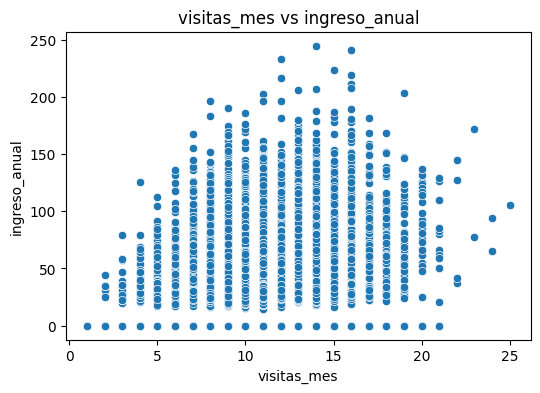

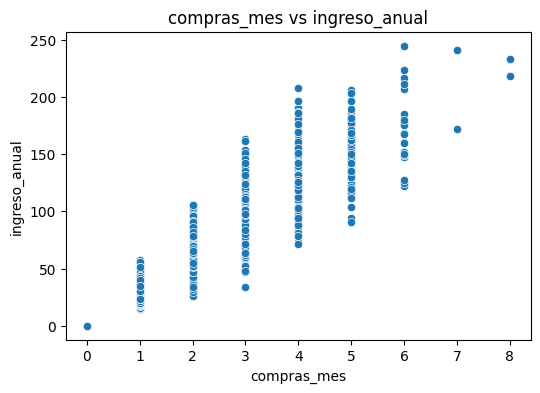

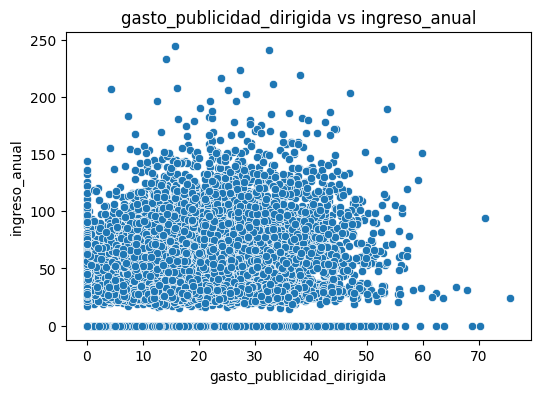

In [14]:
variables = ['visitas_mes', 'compras_mes', 'gasto_publicidad_dirigida']

for var in variables:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=var, y='ingreso_anual')
    plt.title(f'{var} vs ingreso_anual')
    plt.show()

Se decidió incluir scatterplots para explorar visualmente las relaciones entre ingreso_anual y las variables que mostraron mayor correlación en el heatmap. Los gráficos permiten confirmar patrones observados previamente y evaluar la posible presencia de tendencias lineales o valores atípicos.

- Se observa una relación positiva clara entre `compras_mes` e `ingreso_anual`, donde a medida que aumenta el número de compras mensuales, el ingreso anual generado también tiende a incrementarse. Los puntos siguen una tendencia ascendente bastante definida, lo que confirma visualmente la fuerte correlación observada previamente en el heatmap.
- En el caso de `visitas_mes`, se identifica una tendencia positiva moderada; aunque existe cierta relación entre mayor número de visitas y mayores ingresos, la dispersión de los datos es más amplia, lo que sugiere que visitar más la plataforma no siempre se traduce directamente en mayores ingresos.
- La relación entre `gasto_publicidad_dirigida` e `ingreso_anual` presenta una distribución más dispersa y menos estructurada, indicando una asociación más débil y posiblemente influenciada por otros factores adicionales.

### Scatterplot para pares clave

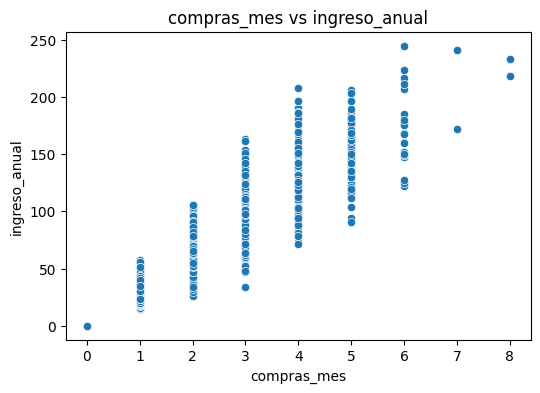

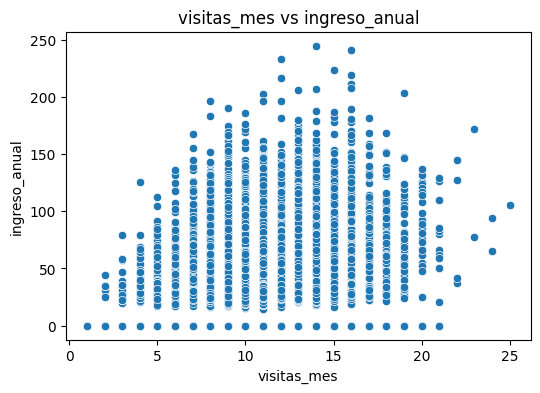

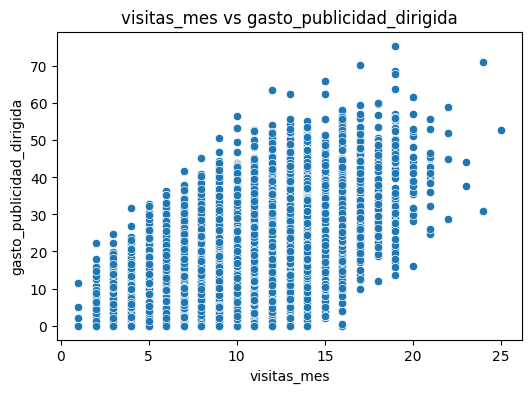

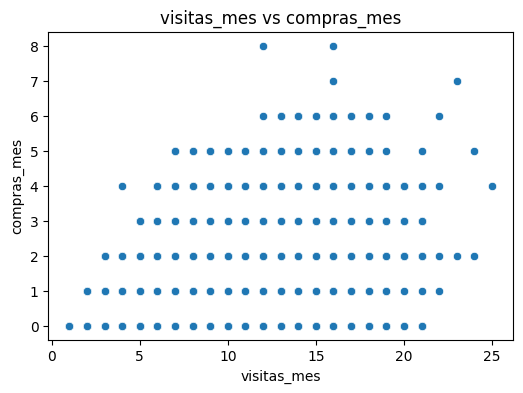

In [15]:
# Visualizar pares de variables con relaciones moderadas o fuertes
pares_clave = [
    ('compras_mes', 'ingreso_anual'),
    ('visitas_mes', 'ingreso_anual'),
    ('visitas_mes', 'gasto_publicidad_dirigida'),
    ('visitas_mes', 'compras_mes')
]

for x, y in pares_clave:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.show()

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), dispersión (alta, media, baja), presencia de outliers y posible colinealidad.


Observaciones iniciales (Scatterplot)

**visitas_mes vs ingreso_anual**
- Dirección: **Positiva**. Se observa que a medida que aumenta el número de visitas mensuales, el ingreso anual tiende a incrementarse, aunque la relación no es perfectamente lineal.
- Dispersión: **Media-alta**. Existe una amplia variabilidad en los valores de ingreso anual para niveles similares de visitas, lo que indica que otros factores influyen en el ingreso generado.
- Outliers: Se observan algunos valores altos de ingreso anual para ciertos niveles de visitas, aunque no parecen extremos ni inconsistentes.
- Posible colinealidad: No se aprecia colinealidad fuerte; la relación es **moderada**.

**compras_mes vs ingreso_anual**
- Dirección: **Positiva fuerte**. Se identifica una tendencia ascendente muy clara: a mayor número de compras mensuales, mayor ingreso anual generado.
- Dispersión: **Baja-media** dentro de cada nivel de compras. Los puntos forman agrupaciones verticales debido a la naturaleza discreta de la variable `compras_mes`.
- Outliers: Algunos valores altos de ingreso anual, pero siguen el patrón general.
- Posible colinealidad: Existe **alta colinealidad** aparente, consistente con la correlación fuerte observada en el heatmap.

**visitas_mes vs gasto_publicidad_dirigida**
- Dirección: **Positiva**. A mayor número de visitas, mayor gasto en publicidad dirigida asignado al usuario.
- Dispersión: **Media**. Aunque la tendencia general es ascendente, existe variabilidad considerable.
- Outliers: Se observan algunos valores altos de gasto, pero dentro de rangos coherentes.
- Posible colinealidad: Relación **moderada** consistente con la correlación previamente detectada.

**visitas_mes vs compras_mes**
- Dirección: **Positiva moderada**. Un mayor número de visitas parece asociarse con mayor número de compras, aunque no de forma estrictamente lineal.
- Dispersión: **Alta**. Muchos niveles de visitas presentan distintos niveles de compras, indicando que no todas las visitas se convierten en transacciones.
- Outliers: No se observan outliers extremos.
- Posible colinealidad: No se identifica colinealidad fuerte.

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [19]:
# Calcular correlación entre variables relevantes
df_num = df.select_dtypes(include=['number'])
corr_pearson = df_num.corr(method='pearson')
print(corr_pearson)

                               edad  nivel_ingreso  visitas_mes  compras_mes  \
edad                       1.000000      -0.009003     0.004998     0.014971   
nivel_ingreso             -0.009003       1.000000     0.001060     0.007309   
visitas_mes                0.004998       0.001060     1.000000     0.353844   
compras_mes                0.014971       0.007309     0.353844     1.000000   
gasto_publicidad_dirigida  0.000062       0.016834     0.578947     0.207528   
satisfaccion              -0.006963       0.002301    -0.003179    -0.003542   
miembro_premium            0.004605      -0.005598    -0.012657     0.003431   
abandono                  -0.011500       0.005870    -0.008943     0.008291   
ingreso_anual              0.017496       0.017446     0.337147     0.967149   

                           gasto_publicidad_dirigida  satisfaccion  \
edad                                        0.000062     -0.006963   
nivel_ingreso                               0.016834      0

In [18]:
# Calcular correlación entre variables relevantes
df_num = df.select_dtypes(include=['number'])
corr_spearman = df_num.corr(method='spearman')
print(corr_spearman)

Correlación Pearson:
                               edad  nivel_ingreso  visitas_mes  compras_mes  \
edad                       1.000000      -0.009003     0.004998     0.014971   
nivel_ingreso             -0.009003       1.000000     0.001060     0.007309   
visitas_mes                0.004998       0.001060     1.000000     0.353844   
compras_mes                0.014971       0.007309     0.353844     1.000000   
gasto_publicidad_dirigida  0.000062       0.016834     0.578947     0.207528   
satisfaccion              -0.006963       0.002301    -0.003179    -0.003542   
miembro_premium            0.004605      -0.005598    -0.012657     0.003431   
abandono                  -0.011500       0.005870    -0.008943     0.008291   
ingreso_anual              0.017496       0.017446     0.337147     0.967149   

                           gasto_publicidad_dirigida  satisfaccion  \
edad                                        0.000062     -0.006963   
nivel_ingreso                         

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves: dirección, magnitud y posible colinealidad.


Observaciones de correlación

**compras_mes vs ingreso_anual**
- Correlación: **Positiva muy fuerte** (0.96).
- Dirección: **Positiva** (cuando aumentan las compras, aumenta el ingreso anual).
- Magnitud: **Muy alta**, cercana a 1.
- Posible colinealidad: **Alta colinealidad**; ambas variables podrían estar midiendo información muy similar o una podría derivarse de la otra.

**visitas_mes vs gasto_publicidad_dirigida**
- Correlación: **Positiva moderada-alta** (0.57).
- Dirección: **Positiva**.
- Magnitud: **Moderada a fuerte**.
- Posible colinealidad: No crítica, pero indica **relación relevante** entre inversión en publicidad y visitas.

**visitas_mes vs compras_mes**
- Correlación: **Positiva moderada** (0.33 – 0.35).
- Dirección: **Positiva**.
- Magnitud: **Moderada**.
- Posible colinealidad: **Baja**; las variables están relacionadas pero aportan información distinta.

**visitas_mes vs ingreso_anual**
- Correlación: **Positiva moderada** (0.32 – 0.34).
- Dirección: **Positiva**.
- Magnitud: **Moderada**.
- Posible colinealidad: **Baja a moderada**.

**miembro_premium vs abandono**
- Correlación: **Negativa débil** (-0.12).
- Dirección: **Negativa** (ser premium podría asociarse con menor abandono).
- Magnitud: **Débil**.
- Posible colinealidad: **No significativa**.

### Punto-biserial

In [21]:
# Calcular correlación entre variables relevantes
from scipy.stats import pointbiserialr
variables_binarias = ['miembro_premium', 'abandono']
variables_numericas = [
    'edad',
    'nivel_ingreso',
    'visitas_mes',
    'compras_mes',
    'gasto_publicidad_dirigida',
    'satisfaccion',
    'ingreso_anual'
]
for binaria in variables_binarias:
    print(f"\nCorrelación punto biserial para: {binaria}")
    
    for numerica in variables_numericas:
        corr, p_value = pointbiserialr(df[binaria], df[numerica])
        print(f"{binaria} vs {numerica}: correlación={corr:.4f}, p-value={p_value:.4f}")


Correlación punto biserial para: miembro_premium
miembro_premium vs edad: correlación=0.0046, p-value=0.5728
miembro_premium vs nivel_ingreso: correlación=-0.0056, p-value=0.4930
miembro_premium vs visitas_mes: correlación=-0.0127, p-value=0.1211
miembro_premium vs compras_mes: correlación=0.0034, p-value=0.6744
miembro_premium vs gasto_publicidad_dirigida: correlación=0.0027, p-value=0.7390
miembro_premium vs satisfaccion: correlación=0.0257, p-value=0.0016
miembro_premium vs ingreso_anual: correlación=0.0931, p-value=0.0000

Correlación punto biserial para: abandono
abandono vs edad: correlación=-0.0115, p-value=0.1590
abandono vs nivel_ingreso: correlación=0.0059, p-value=0.4722
abandono vs visitas_mes: correlación=-0.0089, p-value=0.2734
abandono vs compras_mes: correlación=0.0083, p-value=0.3099
abandono vs gasto_publicidad_dirigida: correlación=-0.0046, p-value=0.5744
abandono vs satisfaccion: correlación=-0.0238, p-value=0.0035
abandono vs ingreso_anual: correlación=-0.0028, p-

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), magnitud (alta, media, baja).

Observaciones Punto-biserial

**miembro_premium vs ingreso_anual**
- Relación: Existe asociación entre pertenecer a membresía premium y el ingreso anual.
- Dirección: **Positiva**.
- Magnitud: **Baja**.

**miembro_premium vs satisfaccion**
- Relación: Usuarios con mayor nivel de satisfacción muestran una ligera tendencia a ser miembros premium.
- Dirección: **Positiva**.
- Magnitud: **Baja**.

**abandono vs satisfaccion**
- Relación: Usuarios con menor satisfacción presentan mayor tendencia al abandono.
- Dirección: **Negativa**.
- Magnitud: **Baja**.

### V de Cramér

In [26]:
# Función para calcular V de Cramér
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(col1, col2):
    
    tabla = pd.crosstab(col1, col2)
    
    chi2 = chi2_contingency(tabla)[0]
    
    n = tabla.sum().sum()
    
    r, k = tabla.shape
    
    v = np.sqrt(chi2 / (n * (min(k-1, r-1))))
    
    return v

In [27]:
# Aplicar V de Cramér en variables relevantes
cat_vars = ['tipo_dispositivo', 'region']

for i in range(len(cat_vars)):
    for j in range(i+1, len(cat_vars)):
        v = cramers_v(df[cat_vars[i]], df[cat_vars[j]])
        print(f"{cat_vars[i]} vs {cat_vars[j]}: V de Cramér = {v:.4f}")

tipo_dispositivo vs region: V de Cramér = 0.0124


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.
Incluye qué ves

Observaciones V de Cramér

**tipo_dispositivo vs region**
- Relación: Asociación entre el tipo de dispositivo utilizado y la región del usuario. Indica que prácticamente **no existe relación significativa** entre la región geográfica y el dispositivo utilizado; ambas variables parecen comportarse de manera independiente.
- Magnitud: **Muy baja** (0.0124).

## Sección 5 - Interpretación de resultados para el negocio

Cada hallazgo  debe incluir:
1) Evidencia visual (si aplica)
2) Evidencia numérica  
3) Interpretación (no causal)  
4) No podemos afirmar
5) Implicación de negocio

---

### Hallazgo 1 — Compras mensuales como principal driver asociado al ingreso anual

**Evidencia visual:** 
-Heatmap muestra una correlación extremadamente alta entre compras_mes e ingreso_anual.
-Scatterplot presenta una relación lineal clara con baja dispersión.  

**Evidencia numérica:** 
- Pearson: 0.967
- Spearman: 0.967

**Interpretación**  
Existe una asociación positiva muy fuerte entre el número de compras mensuales y el ingreso anual generado por cliente. Usuarios que compran frecuentemente tienden a generar mayor valor económico.

**No podemos afirmar**  
- Que aumentar las compras automáticamente cause mayor ingreso.
- Que exista causalidad directa (podría haber variables ocultas como promociones o segmentación previa).

**Implicación de negocio**  
- Estrategias enfocadas en incrementar la frecuencia de compra pueden ser clave.
- Programas de retención y recomendaciones personalizadas pueden impactar el ingreso.

### Hallazgo 2 — Engagement (visitas y publicidad dirigida) asociado moderadamente al ingreso

**Evidencia visual:**  
- Heatmap muestra correlaciones positivas moderadas entre:
    `visitas_mes` e `ingreso_anual`
    `gasto_publicidad_dirigida` y `engagement`.
- Scatterplots muestran tendencia positiva con dispersión media.

**Evidencia numérica:** 
- `visitas_mes` vs `ingreso_anual`:
    Pearson: 0.337
    Spearman: 0.321
- `gasto_publicidad_dirigida` vs `ingreso_anual`:
    Pearson: 0.197

**Interpretación**  
Usuarios que visitan más la plataforma tienden a generar mayores ingresos. La exposición a publicidad dirigida también muestra una asociación positiva, aunque más débil.

**No podemos afirmar**  
- Que aumentar visitas o publicidad cause directamente más ingresos.
- Puede existir sesgo de selección (usuarios valiosos reciben más publicidad).

**Implicación de negocio**  
- Incrementar engagement podría ser una estrategia indirecta para elevar ingresos.
- Analizar optimización del targeting publicitario.

### Hallazgo 3 — Membresía premium muestra asociación positiva débil con ingreso

**Evidencia visual:** 
No destaca fuertemente en heatmap pero aparece en análisis punto biserial.

**Evidencia numérica:** 
Punto biserial (`miembro_premium` vs `ingreso_anual`): 0.093

**Interpretación**  
Ser miembro premium tiene una asociación positiva pero débil con el ingreso generado.

**No podemos afirmar**  
- Que la membresía premium aumente ingresos.
- Puede ser que clientes valiosos sean quienes eligen premium.

**Implicación de negocio** 
- Evaluar si el modelo premium realmente impulsa valor o solo atrae a usuarios ya valiosos.
- Diseñar experimentos A/B.

### Hallazgo 4 — Baja relevancia de variables demográficas y categóricas

**Evidencia visual:**   
- Heatmap muestra correlaciones cercanas a cero con `edad` y `nivel_ingreso`.
- V de Cramér entre variables categóricas 0.012 (muy bajo).

**Evidencia numérica:** 
- `edad` vs `ingreso_anual`: 0.017
- `nivel_ingreso` vs `ingreso_anual`: 0.017
- `tipo_dispositivo` vs `region` (V de Cramér: 0.012)

**Interpretación**  
Factores demográficos y categóricos analizados no presentan asociaciones relevantes con el ingreso anual.

**No podemos afirmar**  
Que estas variables no tengan impacto en otros contextos o segmentos.

**Implicación de negocio** 
Priorizar variables de comportamiento sobre variables demográficas para estrategias de crecimiento.

## Sección 6 - Limitaciones y próximos pasos

### **Limitaciones**
- **Correlación ≠ causalidad**: Las relaciones encontradas indican asociación entre variables, pero no permiten afirmar relaciones causales directas.
- **Variables no observadas**: Es posible que existan factores adicionales no incluidos en el dataset (promociones activas, historial de compras, categorías de producto, estacionalidad, etc.) que influyan en el ingreso anual.
- **Sesgos potenciales en asignación**: Variables como `gasto_publicidad_dirigida` podrían estar influenciadas por estrategias internas (ej. targeting hacia usuarios de alto valor), lo que puede generar correlaciones engañosas.
- **Datos agregados mensualmente**: El uso de métricas agregadas puede ocultar variaciones temporales o patrones específicos de comportamiento.
- **Relaciones lineales principalmente evaluadas**: Pearson evalúa relaciones lineales; aunque Spearman complementa con relaciones monotónicas, podrían existir patrones más complejos no detectados.

### **Próximos pasos** 

**Paso 1 — Probar segmentación adicional**
- Analizar correlaciones por segmentos:
    - miembros premium vs no premium
    - usuarios activos vs inactivos
    - rangos de visitas o frecuencia de compra

- Esto puede revelar patrones ocultos que no aparecen en el análisis global.

**Paso 2 — Análisis predictivo y modelos explicativos**
- Construir modelos de regresión o machine learning para evaluar qué variables explican mejor el ingreso anual.
- Evaluar importancia relativa de variables (feature importance).

**Paso 3 — Validación mediante experimentación**
- Diseñar experimentos A/B para validar hipótesis detectadas:
    - aumentar engagement (visitas)
    - incentivar frecuencia de compra
    - probar beneficios premium específicos

- Esto permitiría evaluar causalidad real.